In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorboard as tb
from packaging import version
from tbparse import SummaryReader


In [3]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.14.0


In [12]:
reader1 = SummaryReader('experiments/HELM/MemoryMaze/')
reader2 = SummaryReader('experiments/HELM/MemoryMaze_ppo_0')

In [43]:
def get_data(path):
    reader1 = SummaryReader(path)
    df1 = reader1.scalars
    print(df1.columns)
    
    df1[df1["tag"]=='rollout/ep_rew_mean'][df1["step"]<12500000]
    df1=df1.drop(columns=["tag"])
    df1.set_index("step", inplace=True)
    df1.sort_index(inplace=True)
    return df1


In [64]:
# gru = get_data('experiments/HELM/MemoryMaze_ppo_0')
# # helm = get_data('experiments/HELM/MemoryMaze')

In [96]:
df = pd.concat([gru, helm], axis=1)

<AxesSubplot:xlabel='Step'>

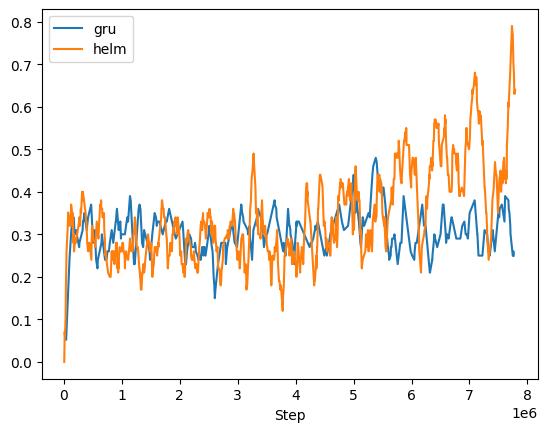

In [97]:
df.plot()

In [181]:
def get_df(env_name, suffix=""):
    gru = pd.read_csv(f"~/Downloads/{env_name}_gru"+suffix+".csv")
    helm = pd.read_csv(f"~/Downloads/{env_name}_helm"+suffix+".csv")
    maxi = max(helm["Step"])
    helm.set_index("Step", inplace=True)
    helm.drop(columns=["Wall time"], inplace=True)
    helm.columns = ["helm"]
    helm.sort_index(inplace=True)

    gru = gru[gru["Step"]<maxi]
    gru.set_index("Step", inplace=True)
    gru.drop(columns=["Wall time"], inplace=True)
    gru.columns = ["gru"]
    gru.sort_index(inplace=True)
    return gru, helm

def get_single_df(env_name, suffix=""):
    gru = pd.read_csv(f"~/Downloads/{env_name}_gru"+suffix+".csv")
    # helm = pd.read_csv(f"~/Downloads/{env_name}_helm"+suffix+".csv")
    
    # gru = gru[gru["Step"]<maxi]
    gru.set_index("Step", inplace=True)
    gru.drop(columns=["Wall time"], inplace=True)
    gru.columns = ["gru"]
    gru.sort_index(inplace=True)
    return gru


def get_title(input_string):
    words = input_string.split('_')

    # Capitalize the first word and join with the rest
    return ' '.join([words[0].capitalize()] + words[1:])

def plot_df(df1, df2, title):
    
    TSBOARD_SMOOTHING = [0.99]

    smooth = []
    smooth1 = []
    for ts_factor in TSBOARD_SMOOTHING:
        smooth.append(df1.ewm(alpha=(1 - ts_factor)).mean())
        smooth1.append(df2.ewm(alpha=(1 - ts_factor)).mean())

    plt.figure(figsize=(15,5))
    for ptx in range(1):
        # plt.subplot(1,3,ptx+1)
        # plt.plot(df["gru"][1000:], alpha=0.4)
        plt.plot(smooth[ptx]["gru"], label="GRU")
        plt.plot(smooth1[ptx]["helm"],label="HELM")
        # plt.title("Comparison of GRU and HELM on "+get_title(env_name))
        # plt.title(label=title)
        plt.legend()
        plt.grid(alpha=0.3)
        

    plt.show()
    
def plot_single_df(df1):
    
    TSBOARD_SMOOTHING = [0.99]

    smooth = []
    # smooth1 = []
    for ts_factor in TSBOARD_SMOOTHING:
        smooth.append(df1.ewm(alpha=(1 - ts_factor)).mean())
        # smooth1.append(df2.ewm(alpha=(1 - ts_factor)).mean())

    # plt.figure(figsize=(,5))
    for ptx in range(1):
        # plt.subplot(1,3,ptx+1)
        print(df.columns)
        plt.plot(df1["gru"], alpha=0.4)
        plt.plot(smooth[ptx]["gru"], label="GRU")
        # plt.plot(smooth1[ptx]["helm"],label="HELM")
        # plt.title("Comparison of GRU and HELM on "+get_title(env_name))
        # plt.legend()
        plt.grid(alpha=0.3)
        

    plt.show()
    
def plot_env(env_name):
    gru, helm = get_df(env_name)
    plot_df(gru, helm, "Comparison of GRU and HELM on "+get_title(env_name))
    try:
        ep_gru, ep_helm = get_df(env_name, "_ep_len")
        print("Plotting ep curve")
        # ep_helm = pd.read_csv(f"~/Downloads/{env_name}_helm_ep_len.csv")
        # ep_gru = pd.read_csv(f"~/Downloads/{env_name}_gru_ep_len.csv")
        plot_df(ep_gru, ep_helm, "Comparison of GRU and HELM Episode lengths on "+get_title(env_name))
        print("Plotted episode lengths")
    except Exception as e:
        # print(e)
        pass
    


mystery_path


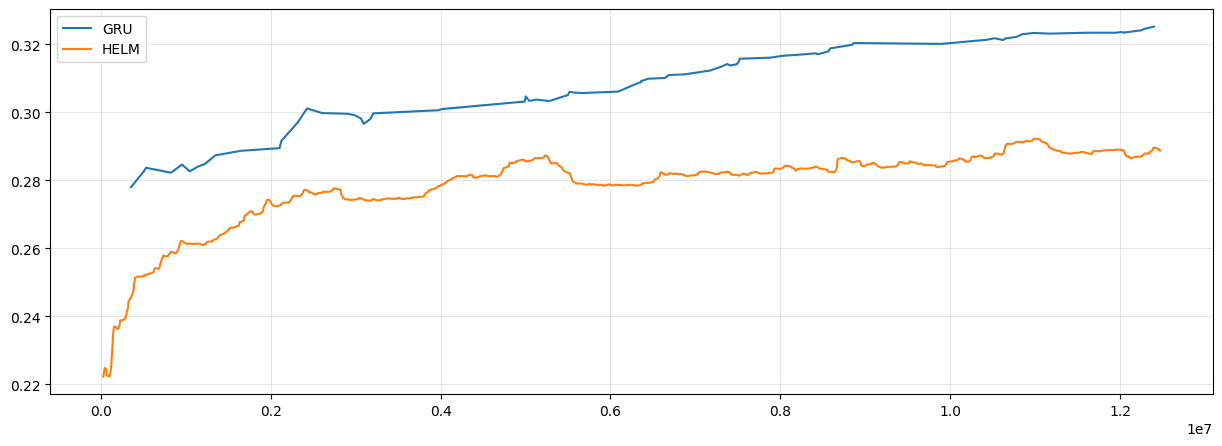

Plotting ep curve


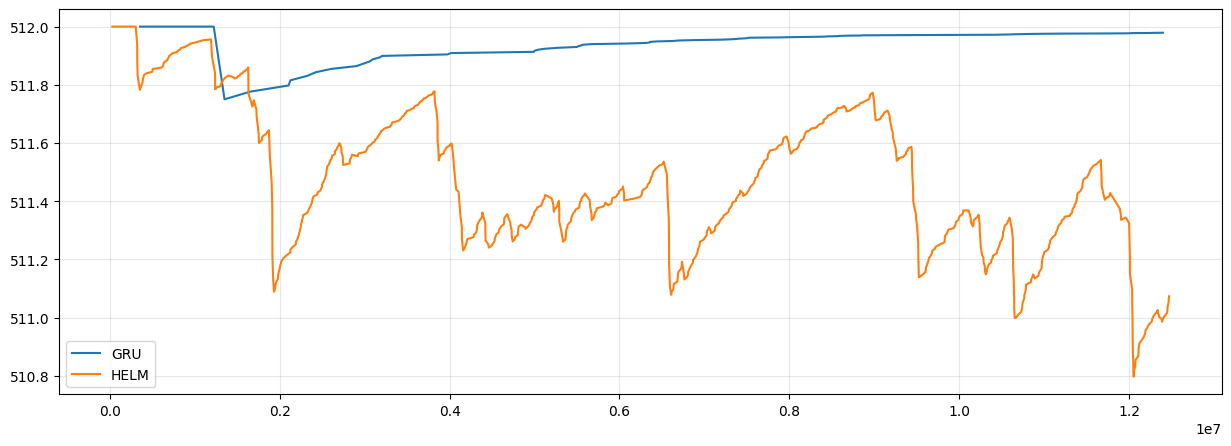

Plotted episode lengths
memory_maze


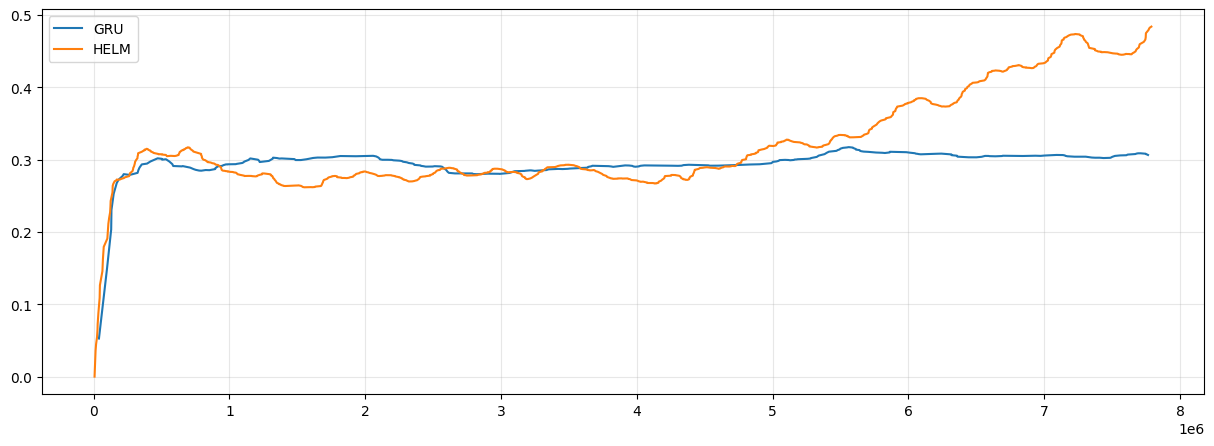

searing_spotlights


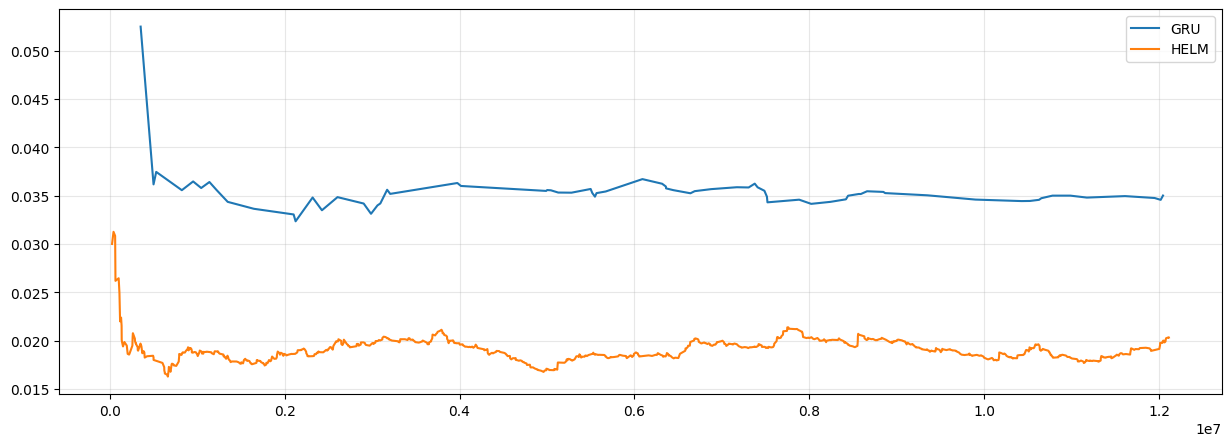

Plotting ep curve


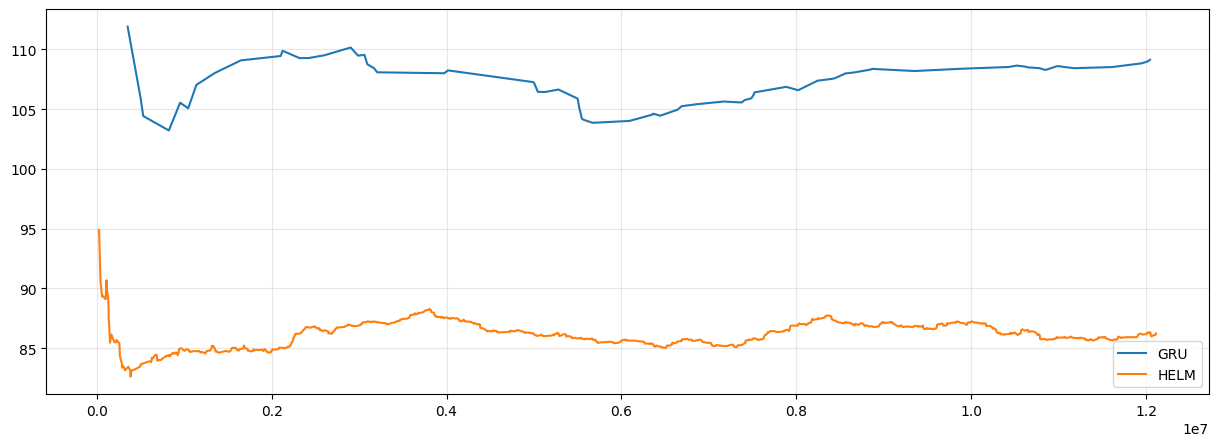

Plotted episode lengths
mortar_mayhem


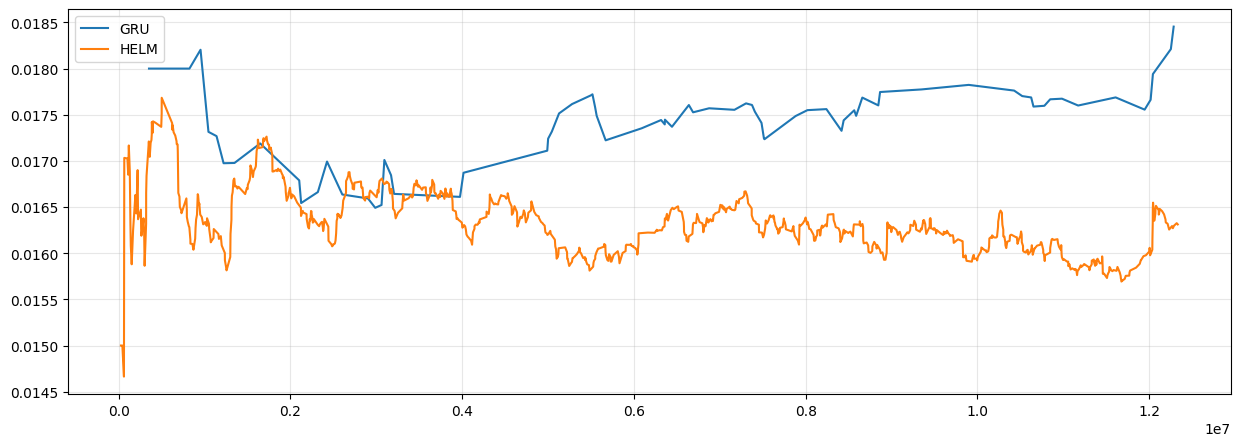

Plotting ep curve


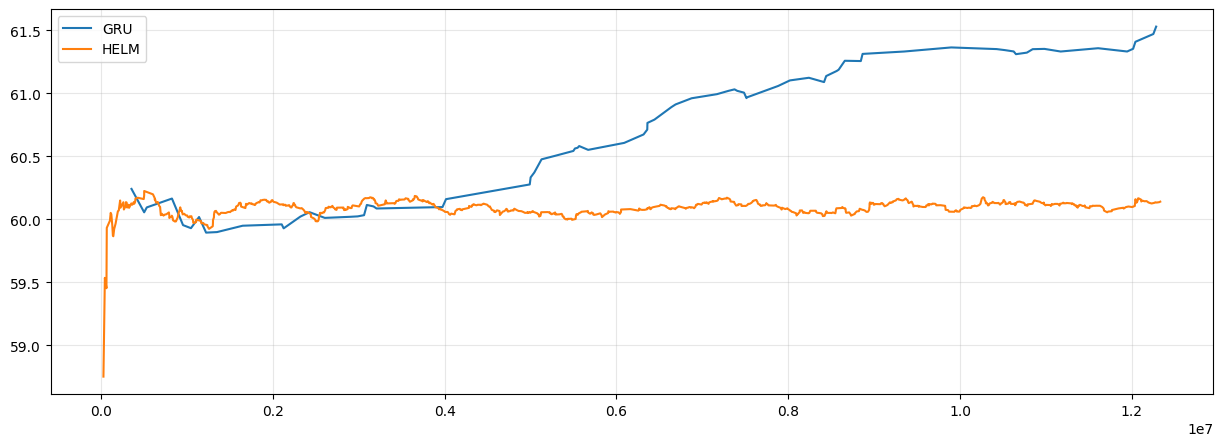

Plotted episode lengths


In [182]:
for env in ["mystery_path", "memory_maze", "searing_spotlights", "mortar_mayhem"]:
    print(env)
    plot_env(env)

mystery_path
Index(['helm'], dtype='object')


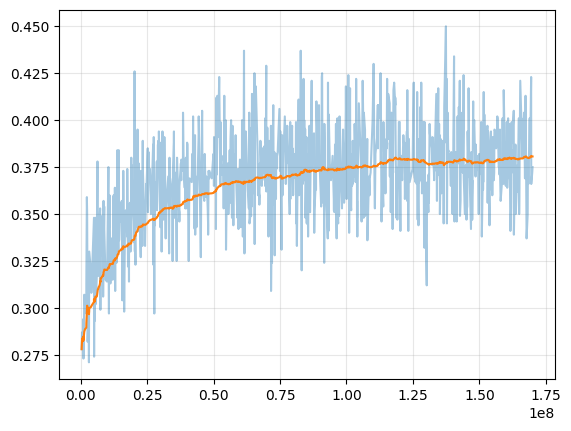

memory_maze
Index(['helm'], dtype='object')


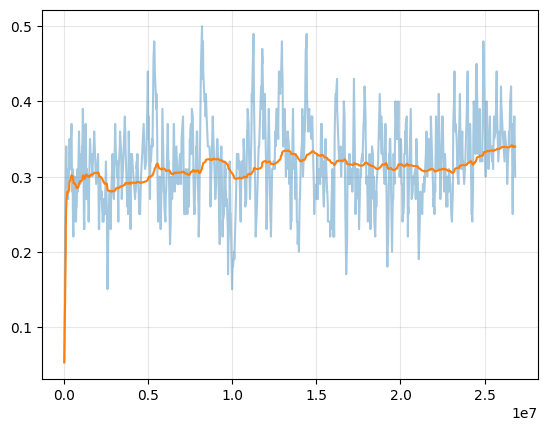

searing_spotlights
Index(['helm'], dtype='object')


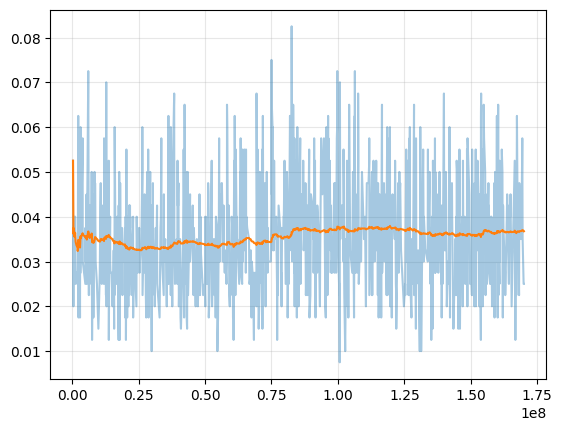

mortar_mayhem
Index(['helm'], dtype='object')


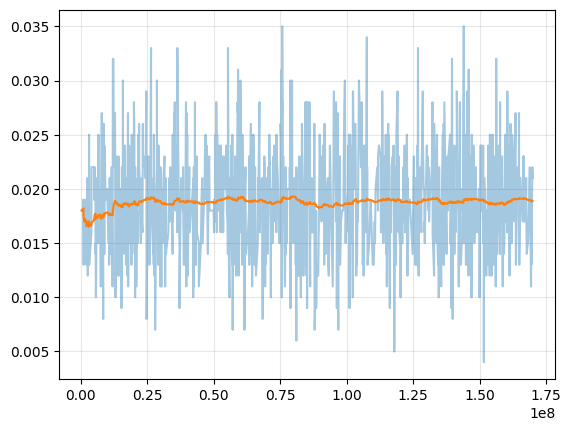

In [183]:
for env in ["mystery_path", "memory_maze", "searing_spotlights", "mortar_mayhem"]:
    print(env)
    plot_single_df(get_single_df(env_name=env))

In [184]:
env_name = "mortar_mayhem"
ep_helm = pd.read_csv(f"~/Downloads/{env_name}_helm_ep_len.csv")
ep_gru = pd.read_csv(f"~/Downloads/{env_name}_gru_ep_len.csv")

In [144]:
ep_helm

,Wall time,Step,Value
0,1.701016e+09,27648,58.750000
1,1.701017e+09,44288,60.310001
2,1.701017e+09,62720,59.290001
3,1.701017e+09,66560,61.340000
4,1.701018e+09,103168,60.209999
...,...,...,...
995,1.701618e+09,12264704,60.660000
996,1.701618e+09,12274176,60.549999
997,1.701619e+09,12288000,59.900002
998,1.701620e+09,12319232,60.439999


In [173]:
get_single_df(env_name=env_name)

,gru
Step,
354304,0.018
501760,0.018
532480,0.018
825344,0.018
954368,0.019
...,...
169388032,0.011
169469952,0.018
169508864,0.013
